<a href="https://colab.research.google.com/github/bulda/TensofFlow/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 epoch = 0 cost = 8.619464874267578
 epoch = 100 cost = 2.7974672317504883
 epoch = 200 cost = 1.5853883028030396
 epoch = 300 cost = 1.3259456157684326
 epoch = 400 cost = 1.2704124450683594
 epoch = 500 cost = 1.2585258483886719
 epoch = 600 cost = 1.2559814453125
 epoch = 700 cost = 1.255436897277832
 epoch = 800 cost = 1.2553203105926514
 epoch = 900 cost = 1.2552953958511353
 epoch = 1000 cost = 1.2552900314331055
accuracy = 0.949999988079071. correct = Tensor("Equal_14:0", dtype=bool)
[ 1.360122   -0.24191399]


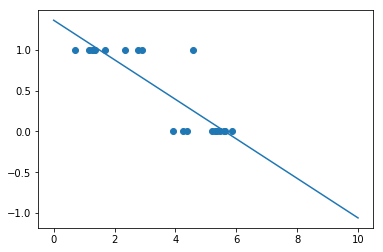

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_label0 = np.random.normal(5,1,10)
x_label1 = np.random.normal(2,1,10)
xs = np.append(x_label0,x_label1)
labels = [0.]*len(x_label0) +[1.]*len(x_label1)

plt.scatter(xs, labels)

learning_rate = 0.001
traiming_epochs = 1001

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X,w):
  return tf.add(tf.multiply(w[1], tf.pow(X,1)), tf.multiply(w[0], tf.pow(X,0)))

w = tf.Variable([0., 0.], name = "param")
y_ = model(X,w)

cost = tf.reduce_sum(tf.square(Y - y_))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)

  for epoch in range(traiming_epochs):
    sess.run(train_op, feed_dict={X: xs, Y: labels})
    cost_ = sess.run(cost, feed_dict={X: xs, Y: labels})
    if epoch % 100 == 0:
      print(f' epoch = {epoch} cost = {cost_}')
  
  tmp = tf.cast(tf.greater(y_, 0.5), tf.float32)
  correct = tf.equal(Y, tmp)
  #print(f'{correct}')
  accuracy_tmp = tf.reduce_mean(tf.cast(correct, tf.float32))
  accuracy = sess.run(accuracy_tmp, feed_dict={X: xs, Y: labels})
  print(f'accuracy = {accuracy}. correct = {correct}')
  
  w_val = sess.run(w)
  print(f'{w.eval()}')

all_xs = np.linspace(0,10,100)
plt.plot(all_xs, all_xs*w_val[1]+w_val[0])
plt.show()

